In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [2]:
data=ps.read_csv('old.csv')

In [3]:
# veri seti ile işlem yapmak için çektik. veri seti hakkında bilgi edindik ve ilk 5 satırını gördük
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 32 columns):
id                             2456 non-null int64
having_IP_Address              2456 non-null int64
URL_Length                     2456 non-null int64
Shortining_Service             2456 non-null int64
having_At_Symbol               2456 non-null int64
double_slash_redirecting       2456 non-null int64
Prefix_Suffix                  2456 non-null int64
having_Sub_Domain              2456 non-null int64
SSLfinal_State                 2456 non-null int64
Domain_registeration_length    2456 non-null int64
Favicon                        2456 non-null int64
port                           2456 non-null int64
HTTPS_token                    2456 non-null int64
Request_URL                    2456 non-null int64
URL_of_Anchor                  2456 non-null int64
Links_in_tags                  2456 non-null int64
SFH                            2456 non-null int64
Submitting_to_email       

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,0,0,1,-1,-1,-1,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,2,0,1,0,0,0,-1,0,1,0,...,0,0,-1,1,0,-1,0,1,0,1
2,3,0,0,0,0,0,-1,-1,-1,0,...,0,0,0,1,1,-1,0,0,1,1
3,4,0,0,0,0,0,-1,-1,-1,1,...,0,0,-1,1,1,-1,0,-1,0,1
4,5,0,0,1,0,0,-1,1,1,0,...,1,0,-1,1,0,-1,0,1,0,-1


Verinin işlenmesi için sınırlara ayırmamız lazım. Result sütunu bağımsız değişkenimiz olur. id sütunu değişkenler arasına girmez. Diğer bütün sütunlar bağımlı değişken olup sonuç sütunu olan Result'u belirlemek için kullanılır.

In [4]:
X=data.values[:,1:31]
y=data.values[:, -1:]

In [5]:
#Hold-out Metodu için eğitim ve test sınıflarımızı belirleyelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

KNN algoritması veri madenciliğinde kullanılan en kolay
algoritmalardan birisidir. KNN algoritmasının çalışma
mantığı, nesnelerin birbirleri arasında yakınlık ilişkilerine
göre kümeleme işlemi yapmaktadır. Doğrusal ayrıştırma
yöntemi ile koordinat düzleminde çalışırlar. KNN, Basit bir
makine öğrenme algoritmasıdır. Küçük veri setine sahip
projelerde yeterince iyi sonuçlar verebilmektedir ancak büyük
veriler üzerinde işlemler yaparken zaman anlamında uzun
sürelerde işlemleri tamamladığı için genellikle küçük
projeler de tercih edilir. burda knn için iki metot uygulanmıştır. cross validation daha iyi sonuç vermiştir. yapılan literatür çalışmasında knn için %90 ve %86 bulgularına ulaşılmıştır. Bizim çalışmamızda ise %94.625 ile daha iyi sonuç elde eidlmiştir

In [6]:
#KNN Cross-velidation Metodu ile uygulama
from sklearn.neighbors import KNeighborsClassifier
sınıflandırıcı=KNeighborsClassifier(n_neighbors=3)
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("KNN için tahmin: {:.3f}" .format(tahmin.mean()*100))

KNN için tahmin: 94.625


In [7]:
#KNN Hold-out Metodu ile uygulama
from sklearn.neighbors import KNeighborsClassifier
sınıflandırıcı=KNeighborsClassifier(n_neighbors=3)
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("KNN  için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

KNN  için tahmin: 93.623


C:\Users\Lenovo\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Yapay sinir ağları popüler bir makine öğrenmesi
algoritmasıdır. Yapay sinir ağları insan beyni gibi
sistemlerden esinlenerek sinir hücrelerinin basit bir şekilde
modellenmesi sonucu oluşur. Yapay sinir ağları, ağırlıklı
bağlantılar aracılığıyla birbirine bağlanan ve her biri kendi
belleğine sahip işlem elemanlarından oluşan paralel ve
dağıtılmış bilgi işleme yapılarıdır. Genel olarak yapay sinir
ağları, model seçimi ve sınıflandırılması, işlev tahmini, en
uygun değeri bulma ve veri sınıflandırması gibi işlerde
başarılıdır. bu algoritma içinde iki yöntem kullanılmıştır, yapılan literatür araştırmasında başarım oranı %86 bulgusuna ulaşılmıştır. Biz ise %97 ile daha iyi bir sonuç elde ettik.

In [8]:
#ANN Hold-out Metodu ile uygulama
from sklearn.neural_network import MLPClassifier
sınıflandırıcı=MLPClassifier()
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("MLP  için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP  için tahmin: 95.522


C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
#ANN Cross-velidation Metodu ile uygulama
from sklearn.neural_network import MLPClassifier
sınıflandırıcı=MLPClassifier()
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("MLP için tahmin: {:.3f}" .format(tahmin.mean()*100))

MLP için tahmin: 97.068


Bagging algoritması var olan bir eğitim setinden yeni eğitim
setleri türeterek temel öğreniciyi yeniden eğitmeyi amaçlayan
bir algoritmadır. yapılan literatür çalışmasında herhangi bir çalışmaya rastlanmamış karşılaştırma için bu algoritma kullanılmıştır başarım oranı ise %97.597 ile iyi bir sonuç elde edilmiştir.

In [10]:
#Bagging Hold-out Metodu ile uygulama
from sklearn.ensemble import BaggingClassifier
sınıflandırıcı=BaggingClassifier()
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("Bagging  için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

Bagging  için tahmin: 96.201


C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#Bagging Cross-velidation Metodu ile uygulama
from sklearn.ensemble import BaggingClassifier
sınıflandırıcı=BaggingClassifier()
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("Bagging için tahmin: {:.3f}" .format(tahmin.mean()*100))#SVM Hold-out Metodu ile uygulama


Bagging için tahmin: 97.597


Bagging ile aynı mantığı taşımaktadır yapılan literatür çalışmasında sadece adabost'a rastlanmıştır onda da doğruluk oranı %84 olmuştur. Biz iki farklı metot kullanarak çalışma yaptık ve cross validation metodu %95.888 ile daha iyi bir sonuç verdi 

In [12]:
#Boosting Cross-velidation Metodu ile uygulama
from sklearn.ensemble import GradientBoostingClassifier
sınıflandırıcı=GradientBoostingClassifier()
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("boosting için tahmin: {:.3f}" .format(tahmin.mean()*100))#SVM Hold-out Metodu ile uygulama


boosting için tahmin: 95.888


In [13]:
#Boosting Hold-out Metodu ile uygulama
from sklearn.ensemble import GradientBoostingClassifier
sınıflandırıcı=GradientBoostingClassifier()
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("Boosting  için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Boosting  için tahmin: 95.522


Destek Vektör Makineleri, temel olarak iki sınıfı ayıran en
iyi çizgiyi bulmaya çalışır. Bunun için karar sınırları ya da
diğer bir deyişle hiper düzlemler belirlenir. İki farklı metot kullanarak sonuç elde ettik. hold-out metodu %95.658 ile daha iyi sonuç verdi. Yapılan literatür çalışmasında ise %88 ve %71 sonuçlarına ulaşıldı.

In [14]:
#SVM Hold-out Metodu ile uygulama
from sklearn import svm
sınıflandırıcı=svm.SVC()
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("SVM   için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

SVM   için tahmin: 94.437


C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
#SVM Cross-velidation Metodu ile uygulama
from sklearn import svm
sınıflandırıcı=svm.SVC()
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("SVM  için tahmin: {:.3f}" .format(tahmin.mean()*100))

SVM  için tahmin: 95.032


Topluluk öğrenme yöntemi olan Random Forest algoritması,
sınıflandırma işlemi sırasında birden fazla karar ağacı üreterek sınıflandırma değerini yükseltmeyi amaçlayan bir
algoritmadır. Bu algoritmada da gene iki farklı metot kullanıldı ve cross validation metodunda %97.882 ile daha iyi sonuç elde edildi. Yapılan literatür çalışmasında %51 %95 ve %87 ile sonuçlar alındı biz bu çalışmada daha iyi sonuç elde ettik.

In [16]:
#Random Forest Hold-out Metodu ile uygulama
from sklearn.ensemble import RandomForestClassifier
sınıflandırıcı=RandomForestClassifier()
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("Random Forest  için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

Random Forest  için tahmin: 96.201


C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [17]:
#Random Forest Cross-velidation Metodu ile uygulama
from sklearn.ensemble import RandomForestClassifier
sınıflandırıcı=RandomForestClassifier()
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("Random Forest için tahmin: {:.3f}" .format(tahmin.mean()*100))

Random Forest için tahmin: 97.882


Decision Tree algoritması, daha önceden tanımlanmış hedef
değişkene sahiptirler. Yapıları nedeniyle en yukardan aşağıya
doğru inen bir strateji sunar. Karar ağacı fazla, fazla sayıda kayıt içeren veri setlerini bir
dizi karar kuralı uygulayarak küçük kayıt gruplarına bölerek
kullanır. Hold-out metodu cros validation'a göre çok küçük bir farkla daha iyi bir sonuç verdi. yapılan litertür çalışmasında %87 sonucuna ulaşıldı. Biz ise bu çalışmamızda %97.558 ile daha iyi sonuç elde ettik.

In [18]:
#Decision Tree Hold-out Metodu ile uygulama
from sklearn.tree import DecisionTreeClassifier
sınıflandırıcı=DecisionTreeClassifier()
sınıflandırıcı.fit(X_train, y_train)
tahmin=sınıflandırıcı.predict(X_test)
print("Karar Ağacı   için tahmin: {:.3f}" .format(accuracy_score(y_test, tahmin)*100))

Karar Ağacı   için tahmin: 95.115


In [19]:
#Decision Tree Cross-velidation Metodu ile uygulama
from sklearn.tree import DecisionTreeClassifier
sınıflandırıcı=DecisionTreeClassifier()
tahmin=cross_val_score(sınıflandırıcı, X, y, cv=5, scoring='accuracy',n_jobs=-1)
print("Karar Ağacı  için tahmin: {:.3f}" .format(tahmin.mean()*100))

Karar Ağacı  için tahmin: 97.475


Logistic regression lineer modeller içerisinde bulunan tahmin kütüphanelerinden biridir. Kütüphane çağrımı yapılır ve içerisinden bir nesne türetilir. Daha önce ayrılmış olan veri fit komutuyla işlenir ve beklenen değerle karşılaştırılır. Confusion Matrix modelin performansını değerlendirmek için kullanılan bir yöntemdir. Bu yöntemi görselleştiredebiliriz. Bu modelin sonucu ise %94.97964721845319 sonuç ortaya koymuştur. yapılan literatür çalışmasında %93 sonucuna ulaşılmıştır. Bizim çalışmamız küçük bir farkla daha iyi sonuç vermiştir.

C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9430122116689281


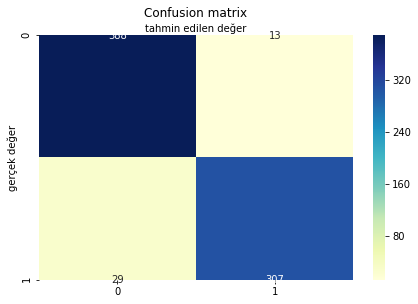

In [20]:
from sklearn.linear_model import LogisticRegression

# varsayılan parametrelei kullanarak model başlatılır
logreg = LogisticRegression()

# veri modele aktarılır
logreg.fit(X_train,y_train)

#beklenen değer
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(ps.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('gerçek değer')
plt.xlabel('tahmin edilen değer')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))